Task 1: Data Exploration and Preparation 

Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Label distribution: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


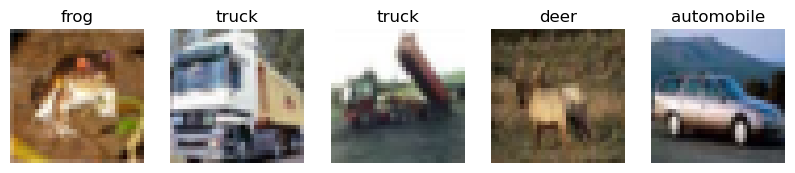

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# loading the cifar dataset from tensorflow imported above
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Shape of the datasets
print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# label distribution
unique_labels, counts = np.unique(y_train, return_counts=True)
print("Label distribution:", dict(zip(unique_labels, counts)))

# Displaying first 5 sample images and creating classnames list 
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

# Normalizing images using the division method of pixels 
x_train = x_train / 255.0
x_test = x_test / 255.0

# Splitting the Train and test data
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


Task 2: Build and Train a CNN Model

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Building the Conv2D → ReLU → MaxPooling → Dropout  repating 3 times CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compiling model using rmsprop optimizer and sparse_categorical_crossentropy loss function 
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model for 15 epochs 
history = model.fit(X_train, Y_train, epochs=15, validation_data=(X_val, Y_val))


C:\Users\Nikhil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.2849 - loss: 1.9117 - val_accuracy: 0.4918 - val_loss: 1.4014
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4964 - loss: 1.4087 - val_accuracy: 0.5440 - val_loss: 1.2735
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.5533 - loss: 1.2552 - val_accuracy: 0.6297 - val_loss: 1.0943
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.5847 - loss: 1.1735 - val_accuracy: 0.6412 - val_loss: 1.0314
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6073 - loss: 1.1156 - val_accuracy: 0.6778 - val_loss: 0.9198
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6235 - loss: 1.0729 - val_accuracy: 0.6519 - val_loss: 0.9920
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6408 - loss: 1.0316 - val_accuracy: 0.6846 - val_loss: 0.9100
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6456 -

Task 3: Evaluate the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6970 - loss: 0.9149 
Test Accuracy: 0.7023
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


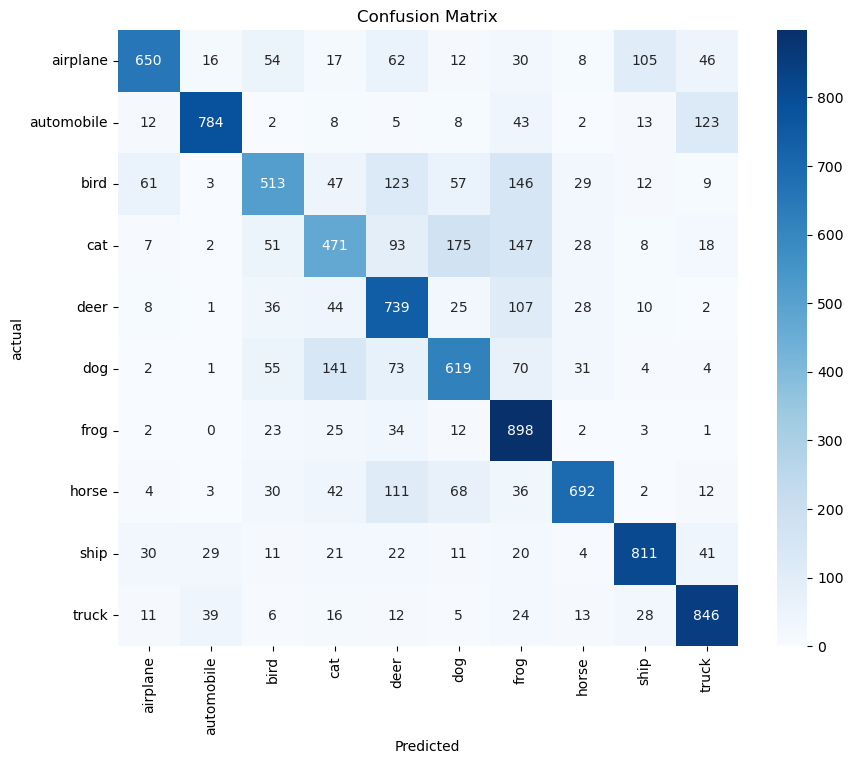

              precision    recall  f1-score   support

    airplane       0.83      0.65      0.73      1000
  automobile       0.89      0.78      0.83      1000
        bird       0.66      0.51      0.58      1000
         cat       0.57      0.47      0.51      1000
        deer       0.58      0.74      0.65      1000
         dog       0.62      0.62      0.62      1000
        frog       0.59      0.90      0.71      1000
       horse       0.83      0.69      0.75      1000
        ship       0.81      0.81      0.81      1000
       truck       0.77      0.85      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



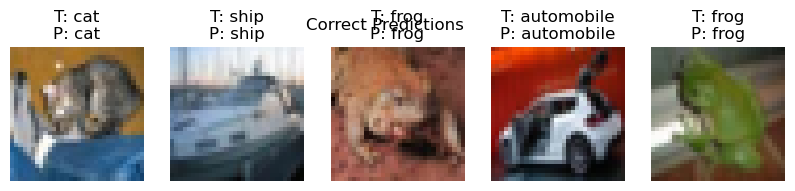

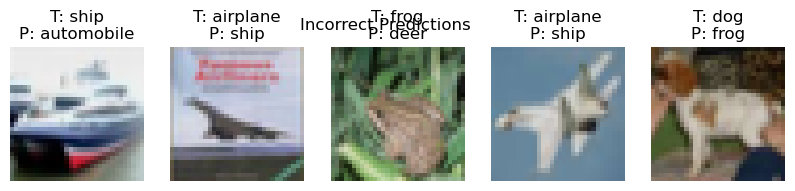

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluating the model upto 4 decimal places 
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions made from the above model developed
y_pred = np.argmax(model.predict(x_test), axis=1)

# Confusion Matrix for better visualization using heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=class_names))

# Show correct and incorrect predictions using visualization imshow functions
correct = np.where(y_pred == y_test.flatten())[0][:5]
incorrect = np.where(y_pred != y_test.flatten())[0][:5]

def plot_examples(indexes, title):
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(indexes):
        plt.subplot(1, 5, i+1)
        plt.imshow(x_test[idx])
        plt.title(f"T: {class_names[y_test[idx][0]]}\nP: {class_names[y_pred[idx]]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_examples(correct, "Correct Predictions")
plot_examples(incorrect, "Incorrect Predictions")


Task 4: Model Improvements

In [37]:
# Trying adam optimizer instead of RMSprop optimizer for better results 
model_improved = models.clone_model(model)
model_improved.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
history_imp = model_improved.fit(X_train, Y_train, epochs=15, validation_data=(X_val, Y_val))


print("Original Optimizer (rmsprop) Accuracy:", test_acc)

imp_loss, imp_acc = model_improved.evaluate(x_test, y_test)
print("Improved Optimizer (adam) Accuracy:", imp_acc)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.2833 - loss: 1.9006 - val_accuracy: 0.4999 - val_loss: 1.3608
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5058 - loss: 1.3657 - val_accuracy: 0.5692 - val_loss: 1.2081
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5576 - loss: 1.2452 - val_accuracy: 0.6137 - val_loss: 1.1086
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5875 - loss: 1.1502 - val_accuracy: 0.6408 - val_loss: 1.0230
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6060 - loss: 1.1041 - val_accuracy: 0.6548 - val_loss: 0.9858
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6172 - loss: 1.0791 - val_accuracy: 0.6676 - val_loss: 0.9467
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6374 - loss: 1.0305 - val_accuracy: 0.6877 - val_loss: 0.9060
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6470 -

In [ ]:
# we got a little bit improved accuracy than 